# Summary

# Churn_Modelling
#### Reference: https://www.kaggle.com/aakash50897/churn-modellingcsv

In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values
dataset[0:10]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


## Data Preprocessing

In [2]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:] # Avoiding dummy variable trap!

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


## Using k-fold Cross Validation to evaluate the model's performance

In [3]:
# Applying k-fold Cross Validation
from sklearn.model_selection import cross_val_score
def cv_score(clf, X, y, cv):
    accuracies = cross_val_score(estimator = clf, X = X, y = y, cv = cv)
    plt.plot(accuracies, '-o')
    plt.axhline(accuracies.mean(), color = 'black', ls = '-')
    plt.axhline(accuracies.mean() + 2 * accuracies.std(), color = 'black', ls = '--')
    plt.axhline(accuracies.mean() - 2 * accuracies.std(), color = 'black', ls = '--')
    plt.xlabel('CV')
    plt.ylabel('Accuracy')
    plt.show()
    return [accuracies.mean(), accuracies.std()]

## Making the Confusion Matrix

In [4]:
from sklearn.metrics import confusion_matrix
def Classification(clf, X, y):
    X_set, y_set = X, y
    y_hat = clf.predict(X_set)
    y_hat = np.reshape(y_hat, -1)
    y_hat[y_hat >= 0.5] = 1
    y_hat[y_hat < 0.5] = 0
    cm = confusion_matrix(y_set, y_hat)
    accuracy = (cm[0, 0] + cm[1, 1])/cm.sum()
    TPR = cm[0, 0]/cm[:, 0].sum() # Sensitivitive, Recall
    TNR = cm[1, 1]/cm[:, 1].sum() # Specificitive
    PPV = cm[0, 0]/cm[0, :].sum() # Positive Predictive Value, Precision
    NPV = cm[1, 1]/cm[1, :].sum() # Negative Predictive Value,  
    F1_score = 2/(1/PPV + 1/TPR)
    summary = {'Accuracy': accuracy, 
               'Positive_Predictive_Value': PPV, 
               'Negative_Predictive_Value': NPV,            
               'Sensitivitive': TPR, 
               'Specificitive': TNR,            
               'F1_score': F1_score, 
               'CM': cm}
    return summary

## Logistic Regression

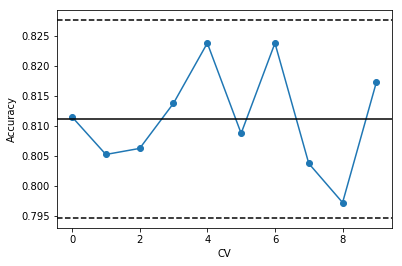

Logistic Regression(L1): CV score = 0.811 (+/- 0.016); Test set accuracy = 0.812


In [5]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C = 0.0363, penalty = 'l1', solver = 'liblinear', random_state = 0)
Logistic_score = cv_score(clf = classifier, X = X_train, y = y_train, cv = 10)
classifier.fit(X_train, y_train)
Logistic_score.append(classifier.score(X_test, y_test))
print('Logistic Regression(L1): CV score = %0.3f (+/- %0.3f); Test set accuracy = %0.3f' % (Logistic_score[0], 2 * Logistic_score[1], Logistic_score[2]))

### Training Set

In [6]:
Classification(clf = classifier, X = X_train, y = y_train)

{'Accuracy': 0.811375,
 'Positive_Predictive_Value': 0.9685929648241206,
 'Negative_Predictive_Value': 0.19791666666666666,
 'Sensitivitive': 0.8249297846729972,
 'Specificitive': 0.6175908221797323,
 'F1_score': 0.8910075839653303,
 'CM': array([[6168,  200],
        [1309,  323]], dtype=int64)}

### Test Set

In [7]:
Classification(clf = classifier, X = X_test, y = y_test)

{'Accuracy': 0.812,
 'Positive_Predictive_Value': 0.9655172413793104,
 'Negative_Predictive_Value': 0.2074074074074074,
 'Sensitivitive': 0.8275120902740463,
 'Specificitive': 0.60431654676259,
 'F1_score': 0.8912037037037037,
 'CM': array([[1540,   55],
        [ 321,   84]], dtype=int64)}

## SVM

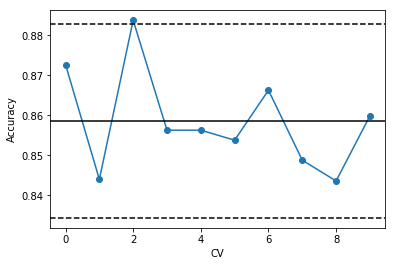

SVM: CV score = 0.858 (+/- 0.024); Test set accuracy = 0.861


In [8]:
from sklearn.svm import SVC
classifier = SVC(C = 9, kernel = 'poly', degree = 3, gamma = 'auto', random_state = 0)
SVM_score = cv_score(clf = classifier, X = X_train, y = y_train, cv = 10)
classifier.fit(X_train, y_train)
SVM_score.append(classifier.score(X_test, y_test))
print('SVM: CV score = %0.3f (+/- %0.3f); Test set accuracy = %0.3f' % (SVM_score[0], 2 * SVM_score[1], SVM_score[2]))

### Training Set

In [9]:
Classification(clf = classifier, X = X_train, y = y_train)

{'Accuracy': 0.86875,
 'Positive_Predictive_Value': 0.9758165829145728,
 'Negative_Predictive_Value': 0.45098039215686275,
 'Sensitivitive': 0.8739803094233474,
 'Specificitive': 0.8269662921348314,
 'F1_score': 0.9220952663599941,
 'CM': array([[6214,  154],
        [ 896,  736]], dtype=int64)}

### Test Set

In [10]:
Classification(clf = classifier, X = X_test, y = y_test)

{'Accuracy': 0.8605,
 'Positive_Predictive_Value': 0.9605015673981191,
 'Negative_Predictive_Value': 0.4666666666666667,
 'Sensitivitive': 0.8764302059496567,
 'Specificitive': 0.75,
 'F1_score': 0.9165420281184563,
 'CM': array([[1532,   63],
        [ 216,  189]], dtype=int64)}

## Naive Bayes

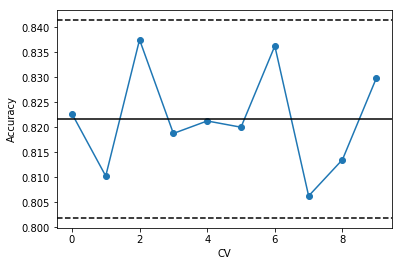

Naive Bayes: CV score = 0.822 (+/- 0.020); Test set accuracy = 0.830


In [11]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
NB_score = cv_score(clf = classifier, X = X_train, y = y_train, cv = 10)
classifier.fit(X_train, y_train)
NB_score.append(classifier.score(X_test, y_test))
print('Naive Bayes: CV score = %0.3f (+/- %0.3f); Test set accuracy = %0.3f' % (NB_score[0], 2 * NB_score[1], NB_score[2]))

### Training Set

In [12]:
Classification(clf = classifier, X = X_train, y = y_train)

{'Accuracy': 0.823375,
 'Positive_Predictive_Value': 0.9462939698492462,
 'Negative_Predictive_Value': 0.34375,
 'Sensitivitive': 0.8490911652811047,
 'Specificitive': 0.6212624584717608,
 'F1_score': 0.8950612699591534,
 'CM': array([[6026,  342],
        [1071,  561]], dtype=int64)}

### Test Set

In [13]:
Classification(clf = classifier, X = X_test, y = y_test)

{'Accuracy': 0.8295,
 'Positive_Predictive_Value': 0.9398119122257054,
 'Negative_Predictive_Value': 0.3950617283950617,
 'Sensitivitive': 0.8595183486238532,
 'Specificitive': 0.625,
 'F1_score': 0.897873614854747,
 'CM': array([[1499,   96],
        [ 245,  160]], dtype=int64)}

## LDA

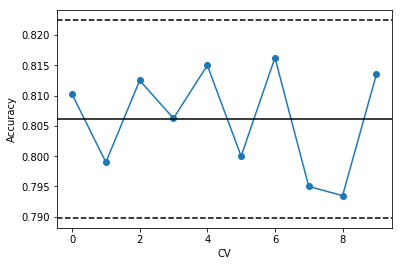

LDA: CV score = 0.806 (+/- 0.016); Test set accuracy = 0.810


In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
classifier = LinearDiscriminantAnalysis()
LDA_score = cv_score(clf = classifier, X = X_train, y = y_train, cv = 10)
classifier.fit(X_train, y_train)
LDA_score.append(classifier.score(X_test, y_test))
print('LDA: CV score = %0.3f (+/- %0.3f); Test set accuracy = %0.3f' % (LDA_score[0], 2 * LDA_score[1], LDA_score[2]))

### Training Set

In [15]:
Classification(clf = classifier, X = X_train, y = y_train)

{'Accuracy': 0.80675,
 'Positive_Predictive_Value': 0.9535175879396985,
 'Negative_Predictive_Value': 0.2340686274509804,
 'Sensitivitive': 0.8292816170445233,
 'Specificitive': 0.5634218289085545,
 'F1_score': 0.8870708546384223,
 'CM': array([[6072,  296],
        [1250,  382]], dtype=int64)}

### Test Set

In [16]:
Classification(clf = classifier, X = X_test, y = y_test)

{'Accuracy': 0.81,
 'Positive_Predictive_Value': 0.9498432601880877,
 'Negative_Predictive_Value': 0.25925925925925924,
 'Sensitivitive': 0.8347107438016529,
 'Specificitive': 0.5675675675675675,
 'F1_score': 0.8885630498533724,
 'CM': array([[1515,   80],
        [ 300,  105]], dtype=int64)}

## QDA

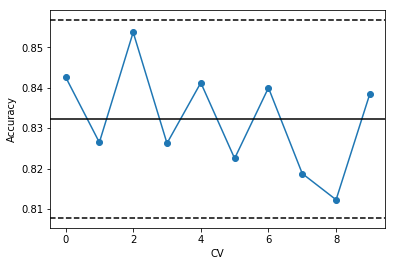

QDA: CV score = 0.832 (+/- 0.024); Test set accuracy = 0.836


In [17]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifier = QuadraticDiscriminantAnalysis()
QDA_score = cv_score(clf = classifier, X = X_train, y = y_train, cv = 10)
classifier.fit(X_train, y_train)
QDA_score.append(classifier.score(X_test, y_test))
print('QDA: CV score = %0.3f (+/- %0.3f); Test set accuracy = %0.3f' % (QDA_score[0], 2 * QDA_score[1], QDA_score[2]))

### Training Set

In [18]:
Classification(clf = classifier, X = X_train, y = y_train)

{'Accuracy': 0.83475,
 'Positive_Predictive_Value': 0.948178391959799,
 'Negative_Predictive_Value': 0.39215686274509803,
 'Sensitivitive': 0.8588904694167852,
 'Specificitive': 0.6597938144329897,
 'F1_score': 0.9013285565009703,
 'CM': array([[6038,  330],
        [ 992,  640]], dtype=int64)}

### Test Set

In [19]:
Classification(clf = classifier, X = X_test, y = y_test)

{'Accuracy': 0.836,
 'Positive_Predictive_Value': 0.9423197492163009,
 'Negative_Predictive_Value': 0.41728395061728396,
 'Sensitivitive': 0.8642898217366303,
 'Specificitive': 0.6475095785440613,
 'F1_score': 0.901619676064787,
 'CM': array([[1503,   92],
        [ 236,  169]], dtype=int64)}

## Decision Tree

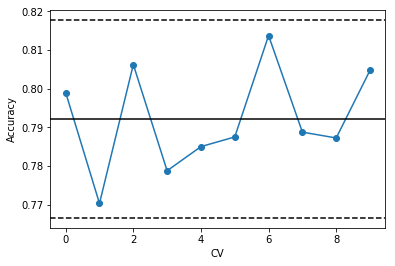

Decision Tree: CV score = 0.792 (+/- 0.026); Test set accuracy = 0.802


In [20]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
Tree_score = cv_score(clf = classifier, X = X_train, y = y_train, cv = 10)
classifier.fit(X_train, y_train)
Tree_score.append(classifier.score(X_test, y_test))
print('Decision Tree: CV score = %0.3f (+/- %0.3f); Test set accuracy = %0.3f' % (Tree_score[0], 2 * Tree_score[1], Tree_score[2]))

### Training Set

In [21]:
Classification(clf = classifier, X = X_train, y = y_train)

{'Accuracy': 1.0,
 'Positive_Predictive_Value': 1.0,
 'Negative_Predictive_Value': 1.0,
 'Sensitivitive': 1.0,
 'Specificitive': 1.0,
 'F1_score': 1.0,
 'CM': array([[6368,    0],
        [   0, 1632]], dtype=int64)}

### Test Set

In [22]:
Classification(clf = classifier, X = X_test, y = y_test)

{'Accuracy': 0.802,
 'Positive_Predictive_Value': 0.8601880877742947,
 'Negative_Predictive_Value': 0.5728395061728395,
 'Sensitivitive': 0.8880258899676375,
 'Specificitive': 0.5098901098901099,
 'F1_score': 0.8738853503184714,
 'CM': array([[1372,  223],
        [ 173,  232]], dtype=int64)}

## Random Forest

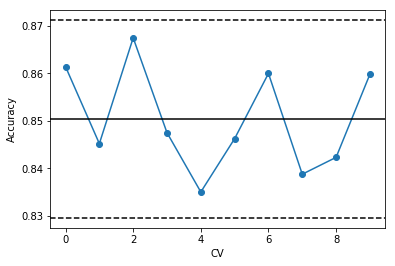

Random Forest(10 decision trees): CV score = 0.850 (+/- 0.021); Test set accuracy = 0.862


In [23]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
Forest_score = cv_score(clf = classifier, X = X_train, y = y_train, cv = 10)
classifier.fit(X_train, y_train)
Forest_score.append(classifier.score(X_test, y_test))
print('Random Forest(10 decision trees): CV score = %0.3f (+/- %0.3f); Test set accuracy = %0.3f' % (Forest_score[0], 2 * Forest_score[1], Forest_score[2]))

### Training Set

In [24]:
Classification(clf = classifier, X = X_train, y = y_train)

{'Accuracy': 0.986625,
 'Positive_Predictive_Value': 0.9993718592964824,
 'Negative_Predictive_Value': 0.9368872549019608,
 'Sensitivitive': 0.9840729859285604,
 'Specificitive': 0.9973907371167645,
 'F1_score': 0.9916634203350215,
 'CM': array([[6364,    4],
        [ 103, 1529]], dtype=int64)}

### Test Set

In [25]:
Classification(clf = classifier, X = X_test, y = y_test)

{'Accuracy': 0.8615,
 'Positive_Predictive_Value': 0.9536050156739811,
 'Negative_Predictive_Value': 0.49876543209876545,
 'Sensitivitive': 0.8822505800464037,
 'Specificitive': 0.7318840579710145,
 'F1_score': 0.9165411268454354,
 'CM': array([[1521,   74],
        [ 203,  202]], dtype=int64)}

# Conclusion

In [26]:
print('Logistic Regression(L1): CV score = %0.3f (+/- %0.3f); Test set accuracy = %0.3f' % (Logistic_score[0], 2 * Logistic_score[1], Logistic_score[2]))
print('SVM: CV score = %0.3f (+/- %0.3f); Test set accuracy = %0.3f' % (SVM_score[0], 2 * SVM_score[1], SVM_score[2]))
print('Naive Bayes: CV score = %0.3f (+/- %0.3f); Test set accuracy = %0.3f' % (NB_score[0], 2 * NB_score[1], NB_score[2]))
print('LDA: CV score = %0.3f (+/- %0.3f); Test set accuracy = %0.3f' % (LDA_score[0], 2 * LDA_score[1], LDA_score[2]))
print('QDA: CV score = %0.3f (+/- %0.3f); Test set accuracy = %0.3f' % (QDA_score[0], 2 * QDA_score[1], QDA_score[2]))
print('Decision Tree: CV score = %0.3f (+/- %0.3f); Test set accuracy = %0.3f' % (Tree_score[0], 2 * Tree_score[1], Tree_score[2]))
print('Random Forest(10 decision trees): CV score = %0.3f (+/- %0.3f); Test set accuracy = %0.3f' % (Forest_score[0], 2 * Forest_score[1], Forest_score[2]))

Logistic Regression(L1): CV score = 0.811 (+/- 0.016); Test set accuracy = 0.812
SVM: CV score = 0.858 (+/- 0.024); Test set accuracy = 0.861
Naive Bayes: CV score = 0.822 (+/- 0.020); Test set accuracy = 0.830
LDA: CV score = 0.806 (+/- 0.016); Test set accuracy = 0.810
QDA: CV score = 0.832 (+/- 0.024); Test set accuracy = 0.836
Decision Tree: CV score = 0.792 (+/- 0.026); Test set accuracy = 0.802
Random Forest(10 decision trees): CV score = 0.850 (+/- 0.021); Test set accuracy = 0.862
